### Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\User\AppData\Local\Temp\ipykernel_2748\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Importing the dataset

In [2]:
url=('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-18/food_consumption.csv')
data=pd.read_csv(url)


In [3]:
data.head()

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96


In [4]:
data.info()
#this shows that the data has no missing values!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emmission  1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


In [5]:
data.shape

(1430, 4)

### Q1: The average C02 emission per person by food category among five countries (Kenya, Uganda, Tanzania, Rwanda and Ethiopia) located in East Africa.

In [6]:
#filter the data set to have only the 5 countries
EA_countries=['Kenya','Uganda', 'Tanzania', 'Rwanda', 'Ethiopia']


In [7]:
East_Africa=data[data['country'].isin(EA_countries)]

In [8]:
East_Africa.head(20)

,country,food_category,consumption,co2_emmission
902,Kenya,Pork,0.29,1.03
903,Kenya,Poultry,0.47,0.50
904,Kenya,Beef,9.54,294.38
905,Kenya,Lamb & Goat,1.86,65.14
906,Kenya,Fish,4.27,6.82
907,Kenya,Eggs,1.84,1.69
908,Kenya,Milk - inc. cheese,94.86,135.12
909,Kenya,Wheat and Wheat Products,34.65,6.61
910,Kenya,Rice,12.94,16.56
911,Kenya,Soybeans,0.20,0.09


In [9]:
#no of food categories
East_Africa['food_category'].value_counts()

food_category
Pork                        5
Poultry                     5
Beef                        5
Lamb & Goat                 5
Fish                        5
Eggs                        5
Milk - inc. cheese          5
Wheat and Wheat Products    5
Rice                        5
Soybeans                    5
Nuts inc. Peanut Butter     5
Name: count, dtype: int64

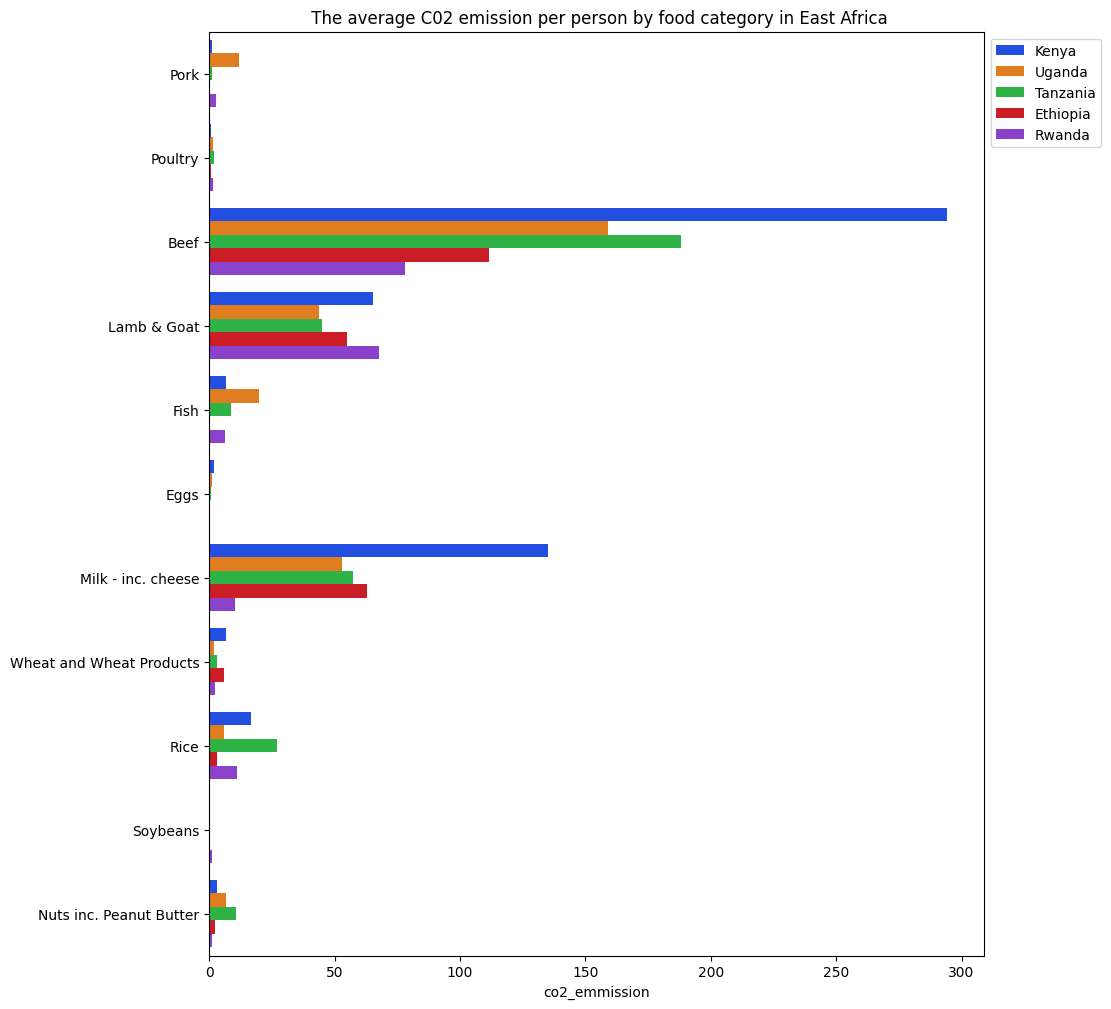

In [10]:
plt.figure(figsize=(10,12))
sns.barplot(data=East_Africa, y='food_category', x='co2_emmission',hue='country',palette='bright')
plt.legend(loc='upper right', bbox_to_anchor=(1.16, 1.0)) 
plt.title(' The average C02 emission per person by food category in East Africa')
plt.ylabel('')

plt.show()

#### Q2: Highlight the marked difference between consumption and emissions in certain food product of your choice

#### I have chosen to highlight the marked difference between consumption and emissions of the top 3 consumed food prodcuts

In [11]:
#find the top 3 most consumed food category
data.head()

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96


In [12]:
top5=data.groupby('food_category')['consumption'].sum().nlargest(5).index

In [13]:
top5

Index(['Milk - inc. cheese', 'Wheat and Wheat Products', 'Rice', 'Poultry',
       'Fish'],
      dtype='object', name='food_category')

In [14]:
#create a new dataframe with the top 5 most consumed food
most_consumed=data[data['food_category'].isin(top5)]

In [15]:
most_consumed.head()

,country,food_category,consumption,co2_emmission
1,Argentina,Poultry,38.66,41.53
4,Argentina,Fish,4.36,6.96
6,Argentina,Milk - inc. cheese,195.08,277.87
7,Argentina,Wheat and Wheat Products,103.11,19.66
8,Argentina,Rice,8.77,11.22


In [16]:
df=most_consumed.groupby('food_category')[['consumption','co2_emmission']].sum()

In [17]:
df.head()

,consumption,co2_emmission
food_category,,
Fish,2247.32,3588.22
Milk - inc. cheese,16350.71,23290.00
Poultry,2758.50,2963.16
Rice,3818.77,4886.91
Wheat and Wheat Products,9301.44,1773.78


In [18]:
import textwrap
def wrap_labels(ax, width, break_long_words=True):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

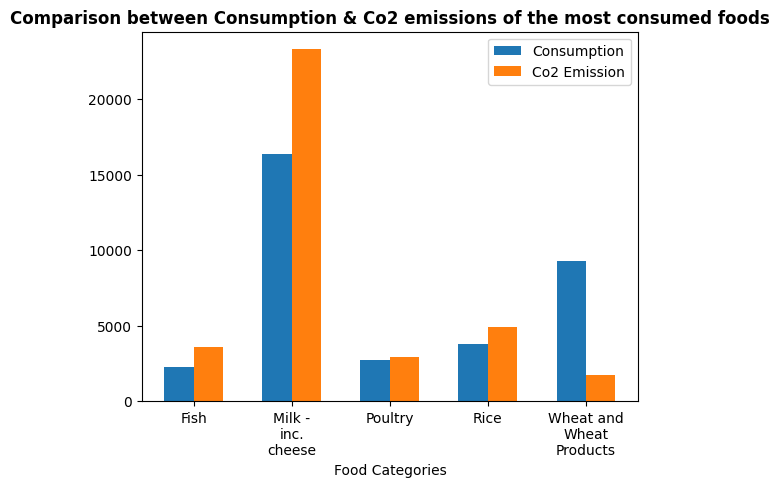

In [19]:
width=0.3
x=np.arange(len(df.index))

fig,ax=plt.subplots()
ax.bar(x-width/2,df['consumption'],width,label='Consumption')
ax.bar(x+width/2,df['co2_emmission'],width,label='Co2 Emission')

plt.xlabel('Food Categories')
plt.title('Comparison between Consumption & Co2 emissions of the most consumed foods',weight='bold')
plt.xticks(x, df.index,rotation=5)
wrap_labels(ax, 10)
plt.legend()

plt.show()

#### Q3: The food consumption of animal and non-animal products and the impact on carbon footprint.

In [20]:
data.head()

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96


In [21]:
newdf=pd.DataFrame(data.groupby('food_category')[['consumption','co2_emmission']].sum())

In [22]:
newdf.head(15)

,consumption,co2_emmission
food_category,,
Beef,1576.04,48633.26
Eggs,1061.29,974.95
Fish,2247.32,3588.22
Lamb & Goat,338.02,11837.38
Milk - inc. cheese,16350.71,23290.00
Nuts inc. Peanut Butter,537.84,951.99
Pork,2096.08,7419.11
Poultry,2758.50,2963.16
Rice,3818.77,4886.91


In [23]:
newdf.index

Index(['Beef', 'Eggs', 'Fish', 'Lamb & Goat', 'Milk - inc. cheese',
       'Nuts inc. Peanut Butter', 'Pork', 'Poultry', 'Rice', 'Soybeans',
       'Wheat and Wheat Products'],
      dtype='object', name='food_category')

C:\Users\User\AppData\Local\Temp\ipykernel_2748\3383049890.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=newdf, x='consumption', y= newdf.index,palette=cols)


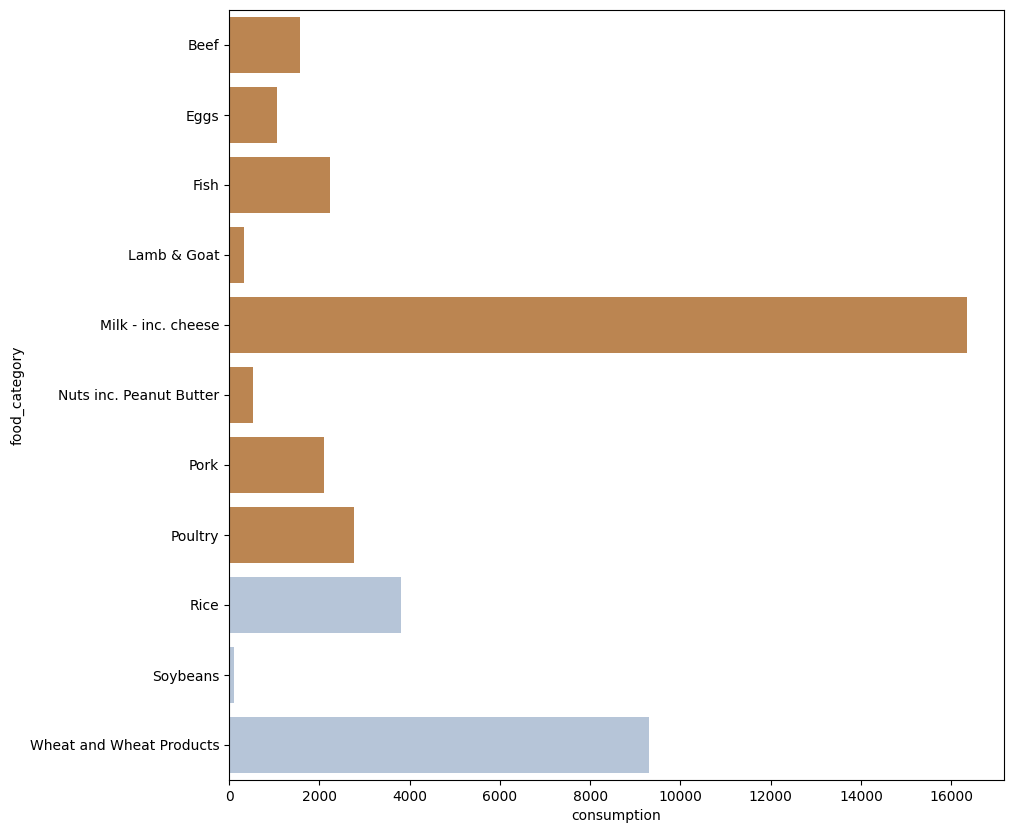

In [24]:
plt.figure(figsize=(10,10))
animal=['Beef', 'Eggs', 'Fish', 'Lamb & Goat', 'Milk - inc. cheese','Nuts inc. Peanut Butter', 'Pork', 'Poultry']
cols=['peru' if index in animal else 'lightsteelblue' for index in newdf.index]
sns.barplot(data=newdf, x='consumption', y= newdf.index,palette=cols)


plt.show()

#### Q4: Beef's contribution to CO2 emissions (kg/person/year)

In [25]:
#filter the data frame to include only beef
beef=data.loc[data['food_category']=='Beef']

In [26]:
beef.head()

,country,food_category,consumption,co2_emmission
2,Argentina,Beef,55.48,1712.00
13,Australia,Beef,33.86,1044.85
24,Albania,Beef,22.50,694.30
35,Iceland,Beef,13.36,412.26
46,New Zealand,Beef,22.49,693.99


In [27]:
#sum all co2 emission due to beef from all countries
total=round(beef.co2_emmission.sum())
print(f'The consumption of beef has resulted in {total} kg/person/year of carbon emissions')

The consumption of beef has resulted in 48633 kg/person/year of carbon emissions


#### Q5: A box plot and interpretation of the CO2 contributions of food levels

C:\Users\User\AppData\Local\Temp\ipykernel_2748\68243588.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=0)


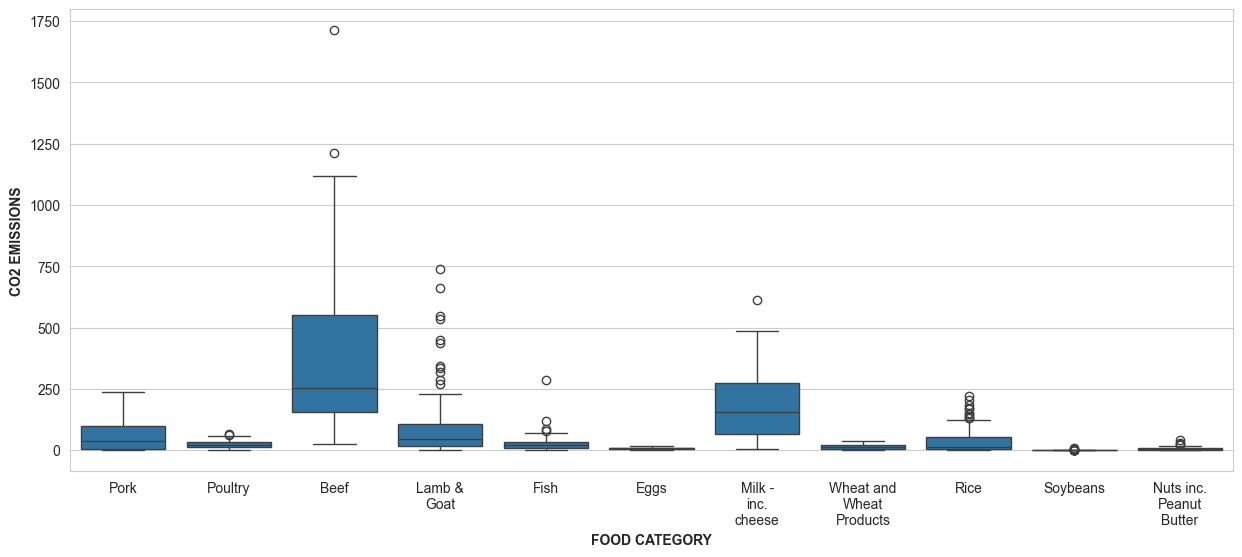

In [46]:

plt.figure(figsize=(15,6))
 
ax=sns.boxplot(x = 'food_category', y = 'co2_emmission', data =data) 
plt.ylabel('CO2 EMISSIONS', weight='bold')
plt.xlabel('FOOD CATEGORY',weight='bold')
wrap_labels(ax,10)

plt.show()

#### Q6: Top 10 Countries with highest emissions. Choose the appropriate visual type.

In [28]:
top_emitters=pd.DataFrame(data.groupby('country')['co2_emmission'].sum().nlargest(10))
top_emitters.reset_index()

,country,co2_emmission
0,Argentina,2172.40
1,Australia,1938.66
2,Albania,1777.85
3,New Zealand,1750.95
4,Iceland,1731.36
5,USA,1718.86
6,Uruguay,1634.91
7,Brazil,1616.73
8,Luxembourg,1598.41
9,Kazakhstan,1575.08


C:\Users\User\AppData\Local\Temp\ipykernel_2748\68243588.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=0)


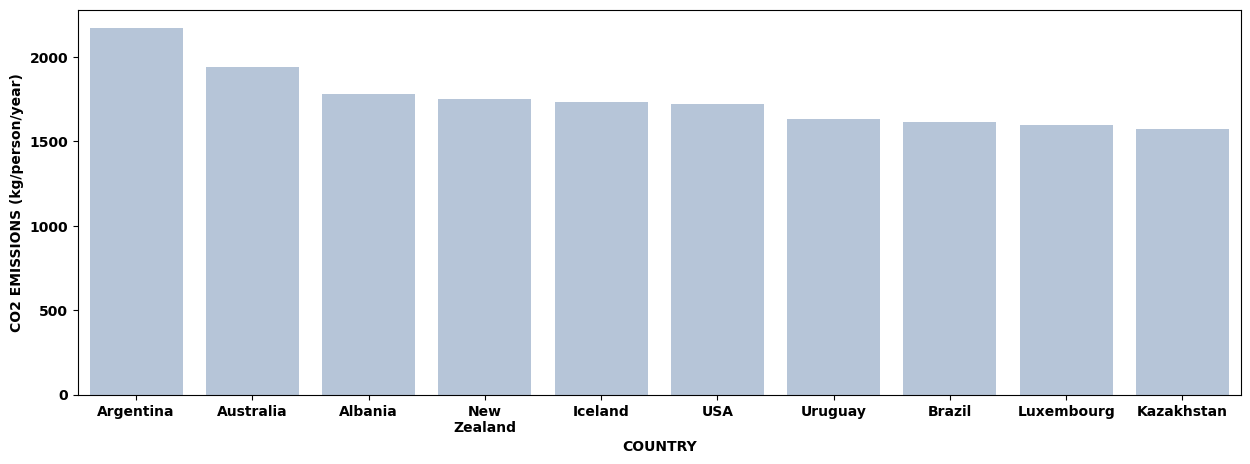

In [29]:
plt.figure(figsize=(15,5))
ax=sns.barplot(data=top_emitters, x='country', y= 'co2_emmission',color='lightsteelblue')
plt.xlabel('COUNTRY',weight='bold')
plt.ylabel('CO2 EMISSIONS (kg/person/year)', weight='bold')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
wrap_labels(ax,10)


plt.show()